# Applications to information retrieval

We provide an example of the application of the notions seen on Euclidean spaces to the representation of words by high-dimensional vectors. We give some elementary algorithms that take advantage of these representations to compute shape similarities between words, and implement them using the *numpy* library.

## What is information Retrieval

Information retrieval is the task of finding material of unstructured nature that satisfies an information need from within a large collection of documents. For instance this may be retrieving textual content from a collection of books or from collections of written documents. We suppose the documents to be stored in digital form on computers.

Then given a collection of documents, the Information Retrieval system stores them in such a way that we can issue a query for which the system returns the relevant documents. A well known such system is a web search engine that indexes the web pages and allows users to issue queries for which they get the relevant pages. 

### Boolean-based information retrieval

In a boolean model we can exress queries by combining a set of *terms* with connectives *and*, *or* , *not*. A document is returned if the boolean query is true. For instance could ask : *Which plays of Shakespeare
contain the terms 'Brutus' and 'Caesar' but not 'Calpurnia'. In general to get an efficient retrieval process we want to index the text collection. Indexing is an offline operation that creates a table where for each term we have documents where it occurs. Such a table (or matrix) is called a **term document** table and for instance it looks like :

|         |Antony and Cleopatra| Julius Caesar | The Tempest | Hamlet | Othello | Macbeth |
|  ---    |         ---        |        ---    |       ---   |   ---  |    ---  |   ---   |
| Antony  |           1        |       1       |       0     |    0   |    0    |   1     |
| Brutus  |           1        |       1       |       0     |    1   |    0    |   0     |
| Caesar  |           1        |       1       |       0     |    1   |    1    |   1     |
|Calpurnia|           0        |       1       |       0     |    0   |    0    |   0     |
|Cleopatra|           1        |       0       |       0     |    0   |    0    |   0     |
| mercy   |           1        |       0       |       1     |    1   |    1    |   1     |
| worser  |           1        |       0       |       1     |    1   |    1    |   0     |

Given this table, the query returns two documents : *Antony and Cleopatra* and *Hamlet*.


**Limits of boolean information retrieval** Boolean information retrieval is an all or nothing method. For instance a spelling error may prevent from finding errors. Another typical problem is the absence of ranking. All results that satisfy the query are returned.
In case the set of such results is large, there is no built-in method for ranking them. 


## Vector space based information retrieval

The basic vector space model for information retrieval fixes the problem of naive information retrieval by naturally providing a ranking method. The basic idea amounts to represent the query and each document by real vectors rather than boolean vectors. The search method computes a similarity between vectors. The similarity scores can be used as criterion for ranking the results.

Let' consider again our Shakespeare works, this time we use words counts rather than booleans to fill in the table:


|         |Antony and Cleopatra| Julius Caesar | The Tempest | Hamlet | Othello | Macbeth |
|  ---    |         ---        |        ---    |       ---   |   ---  |    ---  |   ---   |
| Antony  |           157        |       73       |       0     |    0   |    0    |   1     |
| Brutus  |           4        |       157       |       0     |    2   |    0    |   0     |
| Caesar  |           232        |       227       |       0     |    2   |   1    |   8     |
|Calpurnia|           0        |       10       |       0     |    0   |    0    |   0     |
|Cleopatra|           57        |       0       |       0     |    0   |    0    |   0     |
| mercy   |           2        |       0       |       3     |    8   |    5    |   5     |
| worser  |           2        |       0       |       1     |    1   |    1    |   0     |

We can code a query such as "Find those works where we have Antony and Caesar" as a vector: 

|         | Query              |
|  ---    |         ---        |     
| Antony  |           1        |       
| Brutus  |           0        |      
| Caesar  |           1        |       
|Calpurnia|           0        |      
|Cleopatra|           0        |      
| mercy   |           0        |      
| worser  |           0        |

Computing the dot product of the query with each document yields the following similarity scores:

|         |Antony and Cleopatra| Julius Caesar | The Tempest | Hamlet | Othello | Macbeth |
|  ---    |         ---        |        ---    |       ---   |   ---  |    ---  |   ---   |
| scores  |          389       |       300     |       0     |    0   |    1    |   9     |


This time the results are scored and we can use the scores to rank them. We will see in the next chapters how to improve this first and naive count based representation by taking into account natural language properties and some further notions of linear algebra.  

**Summary** To summarize, the vector space model works on a collection of $n$ documents  $D = (\mathbf{k}_1,v_1)\ldots (\mathbf{k}_n,v_n)$ where $\mathbf{k}_i$ is the index vector and $v_i$ the corresponding value. The search procedure amounts to score the similarity $s_i$ between a query vector $\mathbf{q}$ and each key $\mathbf{k}_i$ and to sort the documents based on their score.
The similarity score can be the dot product, $s_i = \mathbf{q}^\top\mathbf{k}_i$, but most of the time the cosine is used as it ranges in $[-1,1]$:

$$
s_i = \frac{\mathbf{q}^\top\mathbf{k}_i}{||\mathbf{q}||\, ||\mathbf{k}_i||}
$$



## K-nearest neighbors and classification

**Generalization** The method described for information retrieval can be generalized to a wide range of problems in Natural Language Processing as soon as we can design an encoding of linguistic symbols $S$ to vectors, that is a function $\Phi: S \mapsto\mathbb{R}^n$ analog to the encoding from documents to vectors exemplified so far. 

For instance we can choose $\Phi$ to encode a set of words on 26 dimensional vectors containing the character counts of each of the 26 letters of the alphabet found in the word. Using generalized euclidean geometry we can then measure angles and distances between those word vectors and issue queries. This is just a variant of what we illustrated earlier, now we assume a database $D = (\mathbf{k}_1,v_1)\ldots (\mathbf{k}_n,v_n)$ whose keys $\mathbf{k}_i = \Phi(v_i)$ are the vectors encoded by the function $\Phi$, and whose values $v_i$ are word strings


### K-nearest neighbor algorithm (KNN)

The KNN algorithm is a variant of the preceding scheme dedicated to classification. Given a query $q\in S$
the algorithm aims to classify $q$. A **classifier** is a function $f:S\mapsto C$ mapping the input set $S$ to some output discrete set $C$.

For instance we might wish to learn a function from a set of surnames to their nationalities

|  Surname  | Nationality | 
|  ---    |         ---   |    
| Campos |     Portuguese |
| Barros | Portuguese |
| Silva  | Portuguese |
| Aoki   | Japanese |
| Daishi | Japanese |
| Nagano | Japanese |


A trivial solution to the issue is to enumerate the function by creating some sort of dictionary.
But in many cases we cannot practically enumerate the full set $S$, here the set of surnames. There may be new surnames appearing with time for instance.

A classifier is a function that is able to map elements from $S$ to a class in $C$ without memorizing how to map each element of $S$. Rather the function is *learned* from a subset of $S$ paired with actual classes from $C$, the training set, and it is expected that the function *generalizes* its predictions to those elements of $S$ that have not been seen in the training set. For instance a training set might be the Surname,nationality set of examples given above and we expect the classification function to be able to predict the class for unseen input, e.g. *hiroshige* to be Japanese.


The KNN is an instance of such a classifier. We assume a dataset $D = (s_1,c_1)\ldots (s_n,c_n)$ whose elements are couples from surnames to nationality classes. We assume a vectorization function $\Phi:S\mapsto \mathbb{R}^n$ mapping symbols to vectors. Given a query $q\in S$, we compute for each $s_i$:

$$
    \begin{align}
    \text{sim}(q,s_i) &= \frac{\mathbf{q}^\top \mathbf{k}_i}{||\mathbf{q}|| ||\mathbf{k}_i||}\\
     \mathbf{q}   &= \Phi(q)\\
     \mathbf{k}_i &= \Phi(s_i)
    \end{align}
$$

then for some constant $K$ the algorithm creates the set $N = \text{K-argmax}_{(s_i,c_i)\in D}  \text{sim}\quad(\mathbf{q},\mathbf{k}_i)$ of K nearest neighbours and assigns to the query $q$ the class which is the most frequent among the $c_i$ in $N$.





### An example in Python

We consider as dataset of people's names given as couples made of strings and nationalities in Python. 

We first provide an example on how to encode strings to character vectors and to create a database whose keys are vectors and values are nationality classes. 

In [24]:
from collections import Counter
import numpy as np
np.set_printoptions(linewidth=120)



alpha  = "abcdefghijklmnopqrstuvwxyz"

def word2vec(word):
    
    counts   = Counter(word)
    vec      = np.zeros(len(alpha))        
    for idx, char in enumerate(alpha):
        if char in counts:
            vec[idx] = counts[char]
    
    return vec


dataset = [('campos','P'),
           ('barros','P'),
           ('machado','P'),
           ('silva','P'),
           ('henriques','P'),
           ('aoki','J'),
           ('asano','J'),
           ('daishi','J'),
           ('hayakawa','J'),
           ('nagano','J')]

knn_dataset = [ (word2vec(word),cls)  for (word,cls) in dataset]

#prints the 6 first lines
for key, value in knn_dataset[:6]:
    print('key',key)
    print('value',value,'\n')
    
  



key [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
value P 

key [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 2. 1. 0. 0. 0. 0. 0. 0. 0.]
value P 

key [2. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
value P 

key [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
value P 

key [0. 0. 0. 0. 2. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
value P 

key [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
value J 



Given a properly encoded dataset we design the KNN algorithm and we test it on a new surname token:

In [31]:
from numpy.linalg import norm
from collections import Counter

def similarity(x,y):
    
    return np.dot(x,y) / ( norm(x) * norm(y) )
    
    
def knn_classify(query,data,K=3):
    vquery = word2vec(query)
    scores = [ (similarity(vquery,key),cls) for key,cls in data]  
    scores.sort(reverse=True)
    knn    = scores[:K]
    counts = Counter(cls for _ ,cls in knn)    
    cls,c  = counts.most_common(1)[0]
    return cls,c
    
K = 3
cls,c = knn_classify('hiroshige',knn_dataset,K)
print(f'prediction : {cls}, majority vote : {c}/{K}')

prediction : J, majority vote : 2/3


## The curse of dimensionality

The **curse of dimensionality** states that when the dimension of the vector space gets very large, 
the space gets sparse and the distance concentrates. We illustrate each of these aspects with examples.

### Increased sparsity as dimension grows
Let us consider 10 random vectors of dimension 1 (or 10 random scalars). 
One can observe that in this vector space of dimension 1 data points roughly cover the space.
Now consider 10 random vectors of dimension 2. One can observe that these vectors are more sparse.
To get an occupation of the space as dense as in the 1D case we should sample $10^2=100$ random vectors.
For 3D in dimensional space we should sample $10^3=1000$ random vectors and in general a $d-$dimensional space
requires a $d-$exponential amount of data points.


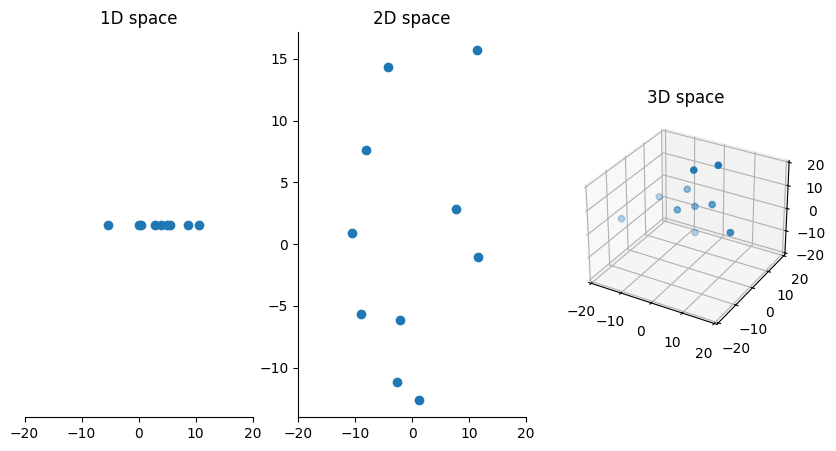

In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 5]
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
from myst_nb import glue

fig = plt.figure()
d   = 10

ax = fig.add_subplot(1, 3, 1)
x = np.zeros((2,10))
x[1] = random.randn(10)*10
ax.set_xlim(-20,20)
ax.set_ylim(-0.1,0.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
ax.scatter(x[1],x[0])
ax.set_title("1D space")

ax = fig.add_subplot(1, 3, 2)
x = random.randn(2,10)*10
ax.set_xlim(-20,20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.scatter(x[1],x[0])
ax.set_title("2D space")


ax = fig.add_subplot(1, 3, 3, projection='3d')
x = random.randn(10)*10
y = random.randn(10)*10
z = random.randn(10)*10
ax.set_xlim3d(-20,20)
ax.set_ylim3d(-20,20)
ax.set_zlim3d(-20,20)
ax.scatter(x,y,z)
ax.set_title("3D space")
glue("cdfig", fig, display=False)



### Concentration of the distance

As the dimension of the space grows the distance between the points tends to concentrate on the mean distance
with lower and lower variance. Here is a simulation for 100 points drawn randomly on spaces of increasing dimensions. 
For each dimension we provide an histogram of the distance distribution between the points


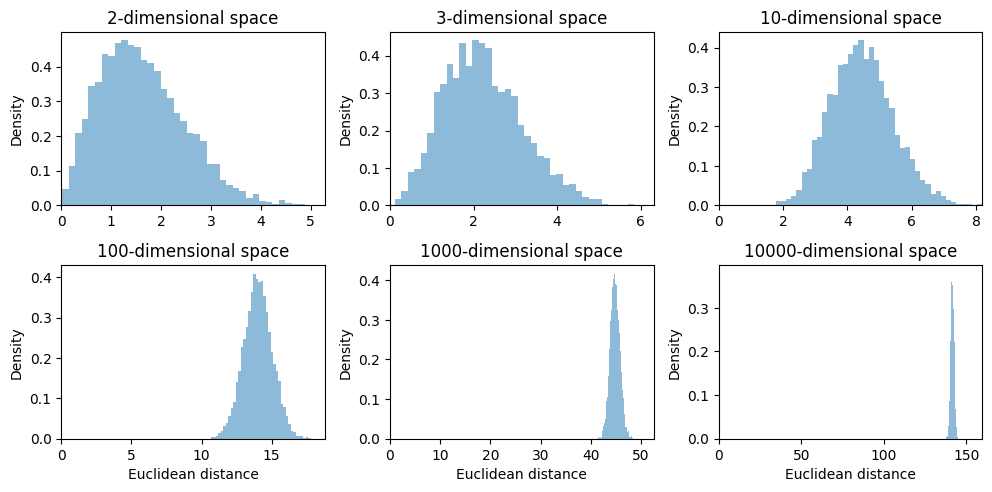

In [2]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 5]
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
from numpy.linalg import norm
from myst_nb import glue

def distances(X):
    return np.array([norm(x-y) for x in X for y in X if (x!=y).all()])
    
fig, axes = plt.subplots(2,3)
for idx,d in enumerate([2,3,10,100,1000,10000]):
    ax = axes[idx//3][idx%3]
    X   = random.randn(100,d)
    D   = distances(X)
    ax.hist(D,density=True,alpha=0.5,bins=40)
    ax.set_title(f"{d}-dimensional space")
    ax.set_xlim(0,max(D)+max(D)//10)
    if idx >= 3:
        ax.set_xlabel("Euclidean distance")
    ax.set_ylabel("Density")
fig.tight_layout(pad=1.0)
glue("cdfig", fig, display=False)

This effect can be seen as a consequence of the law of large numbers and the central limit therem on vectors of large sizes. The concentration of the distance may have an effect of Nearest neighbours algorithms. 
When vectors have high dimensionality the distances are almost all the same and may become meaningless. Methods for countering this effect involve dimensionality reduction.

## Exercises

1. Conjecture why we prefer to use the angular measure (cosine similarity) or the euclidean distance when comparing query and keys ?
**hint**: compare the case where you take the measure between two texts $x$ and $y$ with a case where the measure is taken between $x$ and a version of $y$ where the content is replicated multiple times.

2. Test the `knn_classify` function with other queries and identify its potential problems. For instance, what happens in case of ties ? how to choose the value for parameter K ?

3. Provide a Python implementation of a (toy) vector-based twitter search engine using the tweets provided below. 
This requires to design a tweet to vector function and a query system.


In [32]:
tweets = [
    "@mattcutts have google profiles stopped showing up in searches? cant see them anymore",
    "@ArunBasilLal I love Google Translator too ! :D Good day mate !",
    "reading on my new Kindle2!",
    "My Kindle2 came and I LOVE it! :)",
    'LOVING my new Kindle2.  Named her Kendra in case u were wondering. The "cookbook" is THE tool cuz it tells u all the tricks!  Best gift EVR!',
    "The real AIG scandal / http://bit.ly/b82Px",
    "Any twitter to aprs apps yet?",
    "45 Pros You Should Be Following on Twitter - http://is.gd/sMbZ",
    "Obama is quite a good comedian! check out his dinner speech on CNN :) very funny jokes.",
    'Barack Obama shows his funny side " &gt;&gt; http://tr.im/l0gY !! Great speech..',
    "I like this guy : ' Barack Obama shows his funny side \" &gt;&gt; http://tr.im/l0gY !!",
    "Obama's speech was pretty awesome last night! http://bit.ly/IMXUM"
]